In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)




In [73]:
df=pd.read_csv('./Dataset/t-1_raw_상장.csv',index_col=False,encoding='utf-8')

In [74]:
df.isna().sum()

회사명                  0
산업분류                 0
자본금(천원)             75
거래소코드                0
회계년도                 0
산업분류코드               0
부채비율               208
당좌비율               209
유동비율               209
이자보상배율             209
OCF(천원)             75
이자비용(천원)            75
차입금의존도             208
자기자본구성비율           208
당기순이익(천원)           75
감가상각비(백만원)         208
금융비용(백만원)          208
단기차입금(천원)           75
유동성장기부채(천원)         75
장기차입금(천원)           75
법인세비용차감전손익(백만원)    209
매출액영업이익률           208
자기자본순이익률           208
총자본순이익률            208
매출액(천원)             75
총자본회전률             208
자기자본회전률            208
운전자본회전률            208
순운전자본회전률           208
재고자산회전률            208
당좌자산회전률            208
유동자산회전률            208
매출액증가율             208
총자본증가율             208
자기자본증가율            208
순이익증가율             208
유형자산증가율            208
유동자산증가율            208
재고자산증가율            208
영업이익증가율            208
총자본투자효율            208
부가가치율              208
노동소득분배율            208
자본분배율      

In [75]:
df.dropna(subset='자산총계(천원)', axis=0, inplace=True)
df.dropna(subset='법인세비용차감전손익(백만원)', axis=0, inplace=True)
df.dropna(subset='부가가치율', axis=0, inplace=True)
df.dropna(subset='부채비율', axis=0, inplace=True)
df.dropna(subset='매출액영업이익률', axis=0, inplace=True)

In [76]:
df.isna().sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

In [78]:
len(df['이자보상배율']==999999999.0)

14728

In [668]:
# df.drop('자본잠식률', axis=1, inplace=True)

---

In [7]:
import pandas as pd
import numpy as np

def trim_outliers(series):
    # 양쪽 극단치를 제외한 범위 계산
    lower_percentile = series.quantile(0.01)
    upper_percentile = series.quantile(0.99)

    # 극단치를 제외한 데이터 선택
    trimmed_series = series[(series >= lower_percentile) & (series <= upper_percentile)]

    return trimmed_series

In [8]:
df['이자보상배율'] = (df['영업손익(천원)'] + df['감가상각비(백만원)']) / df['이자비용(천원)']

In [9]:
len(df[df['이자비용(천원)']==0])

539

In [10]:
df['이자보상배율'].fillna(0,inplace=True)

In [11]:
a=df[~(df['이자비용(천원)']==0)]['이자보상배율']

In [12]:
df1 = trim_outliers(a)

In [13]:
df1.agg(['max','min'])

max    3867.593778
min    -156.504252
Name: 이자보상배율, dtype: float64

In [14]:
df['이자보상배율'].replace(np.inf,3867.593778,inplace=True)
df['이자보상배율'].replace(-(np.inf),-156.504252,inplace=True)

---

In [15]:
df.describe()

,자본금(천원),거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),...,자산총계(천원),부채총계(천원),자본총계(천원),연구개발비(천원),영업손익(천원),Year,PER,PBR,자본잠식률,t-1감사의견코드
count,1.472800e+04,14728.000000,14728.000000,14728.000000,14728.000000,1.472800e+04,1.472800e+04,1.472800e+04,1.472800e+04,1.472800e+04,...,1.472800e+04,1.472800e+04,1.472800e+04,1.472800e+04,1.472800e+04,14728.000000,14728.000000,14727.000000,14728.000000,14728.000000
mean,3.192619e+07,78360.579169,2016.493414,35.629006,137.189413,4.941818e+02,5.355806e+02,2.404468e+03,3.793393e+07,8.427318e+06,...,8.190937e+08,4.758003e+08,3.432934e+08,6.634944e+06,3.305201e+07,2016.493414,2.282469,-21.817150,2016.493414,0.005092
std,1.207154e+08,81451.111268,3.148692,18.016641,964.385881,1.732475e+04,1.732471e+04,9.928998e+04,4.252081e+08,4.439073e+07,...,4.893136e+09,3.549111e+09,1.834529e+09,1.294470e+08,3.218270e+08,3.148692,16.049839,468.359810,3.148692,0.071181
min,0.000000e+00,20.000000,2011.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,-1.037850e+06,-3.480396e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-6.760182e+08,-1.955020e+05,-2.124494e+09,2011.000000,-6.710000,-56563.287051,2011.000000,0.000000
25%,5.368126e+06,15710.000000,2014.000000,23.000000,36.860000,7.387000e+01,1.000400e+02,2.990345e-01,-2.555478e+05,2.876200e+05,...,8.553121e+07,2.850565e+07,4.718272e+07,0.000000e+00,4.486360e+05,2014.000000,0.745000,-18.971111,2014.000000,0.000000
50%,9.851856e+06,52880.000000,2017.000000,29.000000,78.680000,1.255200e+02,1.591850e+02,4.299678e+00,7.372347e+06,1.260340e+06,...,1.798639e+08,7.095293e+07,9.760434e+07,6.083405e+05,6.638858e+06,2017.000000,1.325000,-9.380393,2017.000000,0.000000
75%,2.112323e+07,101490.000000,2019.000000,46.000000,145.585000,2.483000e+02,3.007600e+02,2.191129e+01,2.599517e+07,4.143225e+06,...,4.812461e+08,2.159970e+08,2.354335e+08,3.065842e+06,2.286031e+07,2019.000000,2.440000,-3.766485,2019.000000,0.000000
max,3.488419e+09,439090.000000,2021.000000,96.000000,84510.240000,2.088019e+06,2.088019e+06,8.432559e+06,3.797281e+10,2.344328e+09,...,2.023664e+11,1.813191e+11,1.214802e+11,1.153280e+10,2.904934e+10,2021.000000,1890.960000,45.554720,2021.000000,1.000000


---

- 파생변수들 만들기

In [16]:
df['OCF이자보상배율'] = df['OCF(천원)']/df['이자비용(천원)']   ## 파보배

df['부채상환계수'] = (df['당기순이익(천원)']+(df['감가상각비(백만원)']*1000)+(df['금융비용(백만원)']*1000))/(df['단기차입금(천원)']+df['유동성장기부채(천원)']+(df['금융비용(백만원)']*1000))
df['장기부채상환능력'] = df['장기차입금(천원)']/((df['법인세비용차감전손익(백만원)']*1000)+(df['감가상각비(백만원)']*1000)+df['이자비용(천원)'])
df['매출액대비금융비용상환능력'] = df['매출액(천원)']/(df['금융비용(백만원)']*1000)  

df['전체현금흐름(천원)'] = df['OCF(천원)']+df['ICF(천원)']+df['FCF(천원)']
df['잉여현금흐름(FCF)']= df['OCF(천원)']+df['ICF(천원)']

df['연구개발비대비매출액'] = df['연구개발비(천원)']/df['매출액(천원)']
df['매출액대비현금흐름'] = df['전체현금흐름(천원)'] / df['매출액(천원)']
df['매출액대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/ df['매출액(천원)']

df['총자산대비현금흐름'] = df['전체현금흐름(천원)'] / df['자산총계(천원)']
df['총자산대비영업현금흐름'] = df['OCF(천원)'] / df['자산총계(천원)']
df['총자산대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/df['자산총계(천원)']

# 잉여현금흐름(FCF)

In [17]:
for i in df.index :
    if (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '도입기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '성장기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] < 0) :
        df.loc[i,'기업수명주기'] = '성숙기'
    elif (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] > 0):
        df.loc[i,'기업수명주기'] = '쇠퇴기'
    else :
        df.loc[i,'기업수명주기'] = '수축기'

In [18]:
a=df[~(df['이자비용(천원)']==0)]['OCF이자보상배율']

In [19]:
df1 = trim_outliers(a)

In [20]:
df1.agg(['max','min'])

max    3779.226433
min    -228.175417
Name: OCF이자보상배율, dtype: float64

In [22]:
df['OCF이자보상배율'].replace(np.inf,3779.226433,inplace=True)
df['OCF이자보상배율'].replace(-(np.inf),-228.175417,inplace=True)

In [23]:
df['OCF이자보상배율'].describe()

count    1.472700e+04
mean     1.884912e+03
std      8.004387e+04
min     -7.557024e+05
25%     -1.649208e-01
50%      5.269943e+00
75%      2.451487e+01
max      7.264738e+06
Name: OCF이자보상배율, dtype: float64

### 산업분류 value_counts()

In [24]:
df['기업수명주기'].value_counts()

기업수명주기
성숙기    4949
성장기    4377
도입기    2267
수축기    1902
쇠퇴기    1233
Name: count, dtype: int64

---

In [25]:
df.reset_index(drop=True,inplace=True)

In [26]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
df.isna().sum()

회사명            0
산업분류           0
자본금(천원)        0
거래소코드          0
회계년도           0
              ..
매출액대비잉여현금흐름    1
총자산대비현금흐름      1
총자산대비영업현금흐름    1
총자산대비잉여현금흐름    1
기업수명주기         0
Length: 70, dtype: int64

- 매출액이 0인 회사, 음수인 회사는 문제 있는 데이터--> 삭제(0:13개)

In [27]:
df=df[~(df['매출액(천원)']==0.0)]
df=df[~(df['매출액(천원)']<0.0)]

- 자산총계가 0인회사, 음수인 회사는 문제 있는 데이터 --> 상장기업은 없다

In [28]:
# df=df[~(df['자산총계(천원)']==0)]
# df=df[~(df['자산총계(천원)']<0)]

- 부채총계가 음수인 회사는 문제 있는 데이터  -> 상장기업은 없다 

In [29]:
df[df['부채총계(천원)']==0]

,회사명,산업분류,자본금(천원),거래소코드,회계년도,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,...,매출액대비금융비용상환능력,전체현금흐름(천원),잉여현금흐름(FCF),연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,기업수명주기


In [30]:
# pd.set_option('display.max_seq_item',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isna().sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

- 결측치 확인 끝!!!!

---
- inf,-inf값 확인!!!

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                 0
산업분류                0
자본금(천원)             0
거래소코드               0
회계년도                0
산업분류코드              0
부채비율                0
당좌비율                0
유동비율                0
이자보상배율              0
OCF(천원)             0
이자비용(천원)            0
차입금의존도              0
자기자본구성비율            0
당기순이익(천원)           0
감가상각비(백만원)          0
금융비용(백만원)           0
단기차입금(천원)           0
유동성장기부채(천원)         0
장기차입금(천원)           0
법인세비용차감전손익(백만원)     0
매출액영업이익률            0
자기자본순이익률            0
총자본순이익률             0
매출액(천원)             0
총자본회전률              0
자기자본회전률             0
운전자본회전률             0
순운전자본회전률            0
재고자산회전률             0
당좌자산회전률             0
유동자산회전률             0
매출액증가율              0
총자본증가율              0
자기자본증가율             0
순이익증가율              0
유형자산증가율             0
유동자산증가율             0
재고자산증가율             0
영업이익증가율             0
총자본투자효율             0
부가가치율               0
노동소득분배율             0
자본분배율               0
이윤분배율               0
ICF(천원)   

- OCF이자보상배율 : 538개
- 부채상환계수 : 2개
- 매출액대비금융비용상환능력 : 27개

In [32]:
(df['이자비용(천원)']==0).value_counts()

이자비용(천원)
False    14177
True       538
Name: count, dtype: int64

In [33]:
(df['OCF이자보상배율']==np.inf).value_counts()
# ['회사명'].unique()

OCF이자보상배율
False    14715
Name: count, dtype: int64

- ~~이자보상배율이 inf,-inf 값은 분모 이자비용이 0이므로, OCF이자보상배율 또한 없다~~
- ~~0으로 대체~~

In [714]:
# df['OCF이자보상배율'] = df['OCF이자보상배율'].replace([np.inf, -np.inf], 0)

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                 0
산업분류                0
자본금(천원)             0
거래소코드               0
회계년도                0
산업분류코드              0
부채비율                0
당좌비율                0
유동비율                0
이자보상배율              0
OCF(천원)             0
이자비용(천원)            0
차입금의존도              0
자기자본구성비율            0
당기순이익(천원)           0
감가상각비(백만원)          0
금융비용(백만원)           0
단기차입금(천원)           0
유동성장기부채(천원)         0
장기차입금(천원)           0
법인세비용차감전손익(백만원)     0
매출액영업이익률            0
자기자본순이익률            0
총자본순이익률             0
매출액(천원)             0
총자본회전률              0
자기자본회전률             0
운전자본회전률             0
순운전자본회전률            0
재고자산회전률             0
당좌자산회전률             0
유동자산회전률             0
매출액증가율              0
총자본증가율              0
자기자본증가율             0
순이익증가율              0
유형자산증가율             0
유동자산증가율             0
재고자산증가율             0
영업이익증가율             0
총자본투자효율             0
부가가치율               0
노동소득분배율             0
자본분배율               0
이윤분배율               0
ICF(천원)   

- 이자보상배율과 마찬가지로 부채상환계수, 장기부채상환능력, 매출액대비금융비용상환능력 또한 0으로 대체

In [35]:
len(df[(df['단기차입금(천원)']==0) &(df['유동성장기부채(천원)']==0) &(df['금융비용(백만원)']==0)])

2

In [37]:
len(df[df['금융비용(백만원)']==0])

27

In [38]:
df['부채상환계수'] = df['부채상환계수'].replace([np.inf, -np.inf], 0)
df['매출액대비금융비용상환능력'] = df['매출액대비금융비용상환능력'].replace([np.inf, -np.inf], 0)

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.isin([np.inf,-np.inf]).sum()

회사명                0
산업분류               0
자본금(천원)            0
거래소코드              0
회계년도               0
산업분류코드             0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

- 데이터의 결측치, 무한대값 모두 0

---

In [41]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    14640
1.0       75
Name: count, dtype: int64

In [722]:
# df[(df['산업분류']=='공공 행정, 국방 및 사회보장 행정')]

---

#### 순서 재 배열 
    - t-1 감사의견 코드 맨 뒤로

In [42]:
df.columns

Index(['회사명', '산업분류', '자본금(천원)', '거래소코드', '회계년도', '산업분류코드', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '연구개발비(천원)', '영업손익(천원)', 'Year', 'PER', 'PBR',
       '자본잠식률', 't-1감사의견코드', 'OCF이자보상배율', '부채상환계수', '장기부채상환능력',
       '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)', '연구개발비대비매출액', '매출액대비현금흐름',
       '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름', '총자산대비잉여현금흐름', '기업수명주기'],
      dtype='object')

In [43]:
order =['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류','부채비율', '당좌비율', '유동비율', '이자보상배율',
       'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율', '당기순이익(천원)', '감가상각비(백만원)',
       '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)', '장기차입금(천원)', '법인세비용차감전손익(백만원)',
       '매출액영업이익률', '자기자본순이익률', '총자본순이익률', '매출액(천원)', '총자본회전률', '자기자본회전률',
       '운전자본회전률', '순운전자본회전률', '재고자산회전률', '당좌자산회전률', '유동자산회전률', '매출액증가율',
       '총자본증가율', '자기자본증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율',
       '영업이익증가율', '총자본투자효율', '부가가치율', '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)',
       'FCF(천원)', '자산총계(천원)', '부채총계(천원)', '자본총계(천원)',  '자본금(천원)', 'PER', 'PBR',
       '영업손익(천원)', '연구개발비(천원)', '자본잠식률', 'OCF이자보상배율',
       '부채상환계수', '장기부채상환능력', '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)',
       '연구개발비대비매출액', '매출액대비현금흐름', '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름',
       '총자산대비잉여현금흐름', '기업수명주기', 't-1감사의견코드']

In [44]:
len(order)

70

In [45]:
df = df.reindex(columns=order)

In [46]:
df['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    14640
1.0       75
Name: count, dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

회사명                0
거래소코드              0
회계년도               0
Year               0
산업분류코드             0
산업분류               0
부채비율               0
당좌비율               0
유동비율               0
이자보상배율             0
OCF(천원)            0
이자비용(천원)           0
차입금의존도             0
자기자본구성비율           0
당기순이익(천원)          0
감가상각비(백만원)         0
금융비용(백만원)          0
단기차입금(천원)          0
유동성장기부채(천원)        0
장기차입금(천원)          0
법인세비용차감전손익(백만원)    0
매출액영업이익률           0
자기자본순이익률           0
총자본순이익률            0
매출액(천원)            0
총자본회전률             0
자기자본회전률            0
운전자본회전률            0
순운전자본회전률           0
재고자산회전률            0
당좌자산회전률            0
유동자산회전률            0
매출액증가율             0
총자본증가율             0
자기자본증가율            0
순이익증가율             0
유형자산증가율            0
유동자산증가율            0
재고자산증가율            0
영업이익증가율            0
총자본투자효율            0
부가가치율              0
노동소득분배율            0
자본분배율              0
이윤분배율              0
ICF(천원)            0
FCF(천원)            0
자산총계(천원)     

In [49]:
# df.to_csv('./Dataset/분리전_상장.csv', index=False, encoding='utf-8')

---
- train-test split (2.3 / 7.7)

In [733]:
# (df['부채비율']==df['부채비율1']).value_counts()
# # (raw_data_1['회사명']==data_target['회사명']).value_counts()

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df.drop('t-1감사의견코드',axis=1),df['t-1감사의견코드'],test_size=0.23,stratify=df['t-1감사의견코드'],random_state=0) 

In [53]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


11330
3385
11330
3385


---

In [54]:
train_data = pd.concat([X_train,y_train],axis=1)

In [55]:
train_data.shape

(11330, 70)

In [739]:
# train_data.to_csv('train_data_상장.csv',index=False,encoding='euc-kr')

---

In [56]:
y_train.value_counts()

t-1감사의견코드
0.0    11272
1.0       58
Name: count, dtype: int64

In [57]:
y_test.value_counts()

t-1감사의견코드
0.0    3368
1.0      17
Name: count, dtype: int64

- X_train box-plot

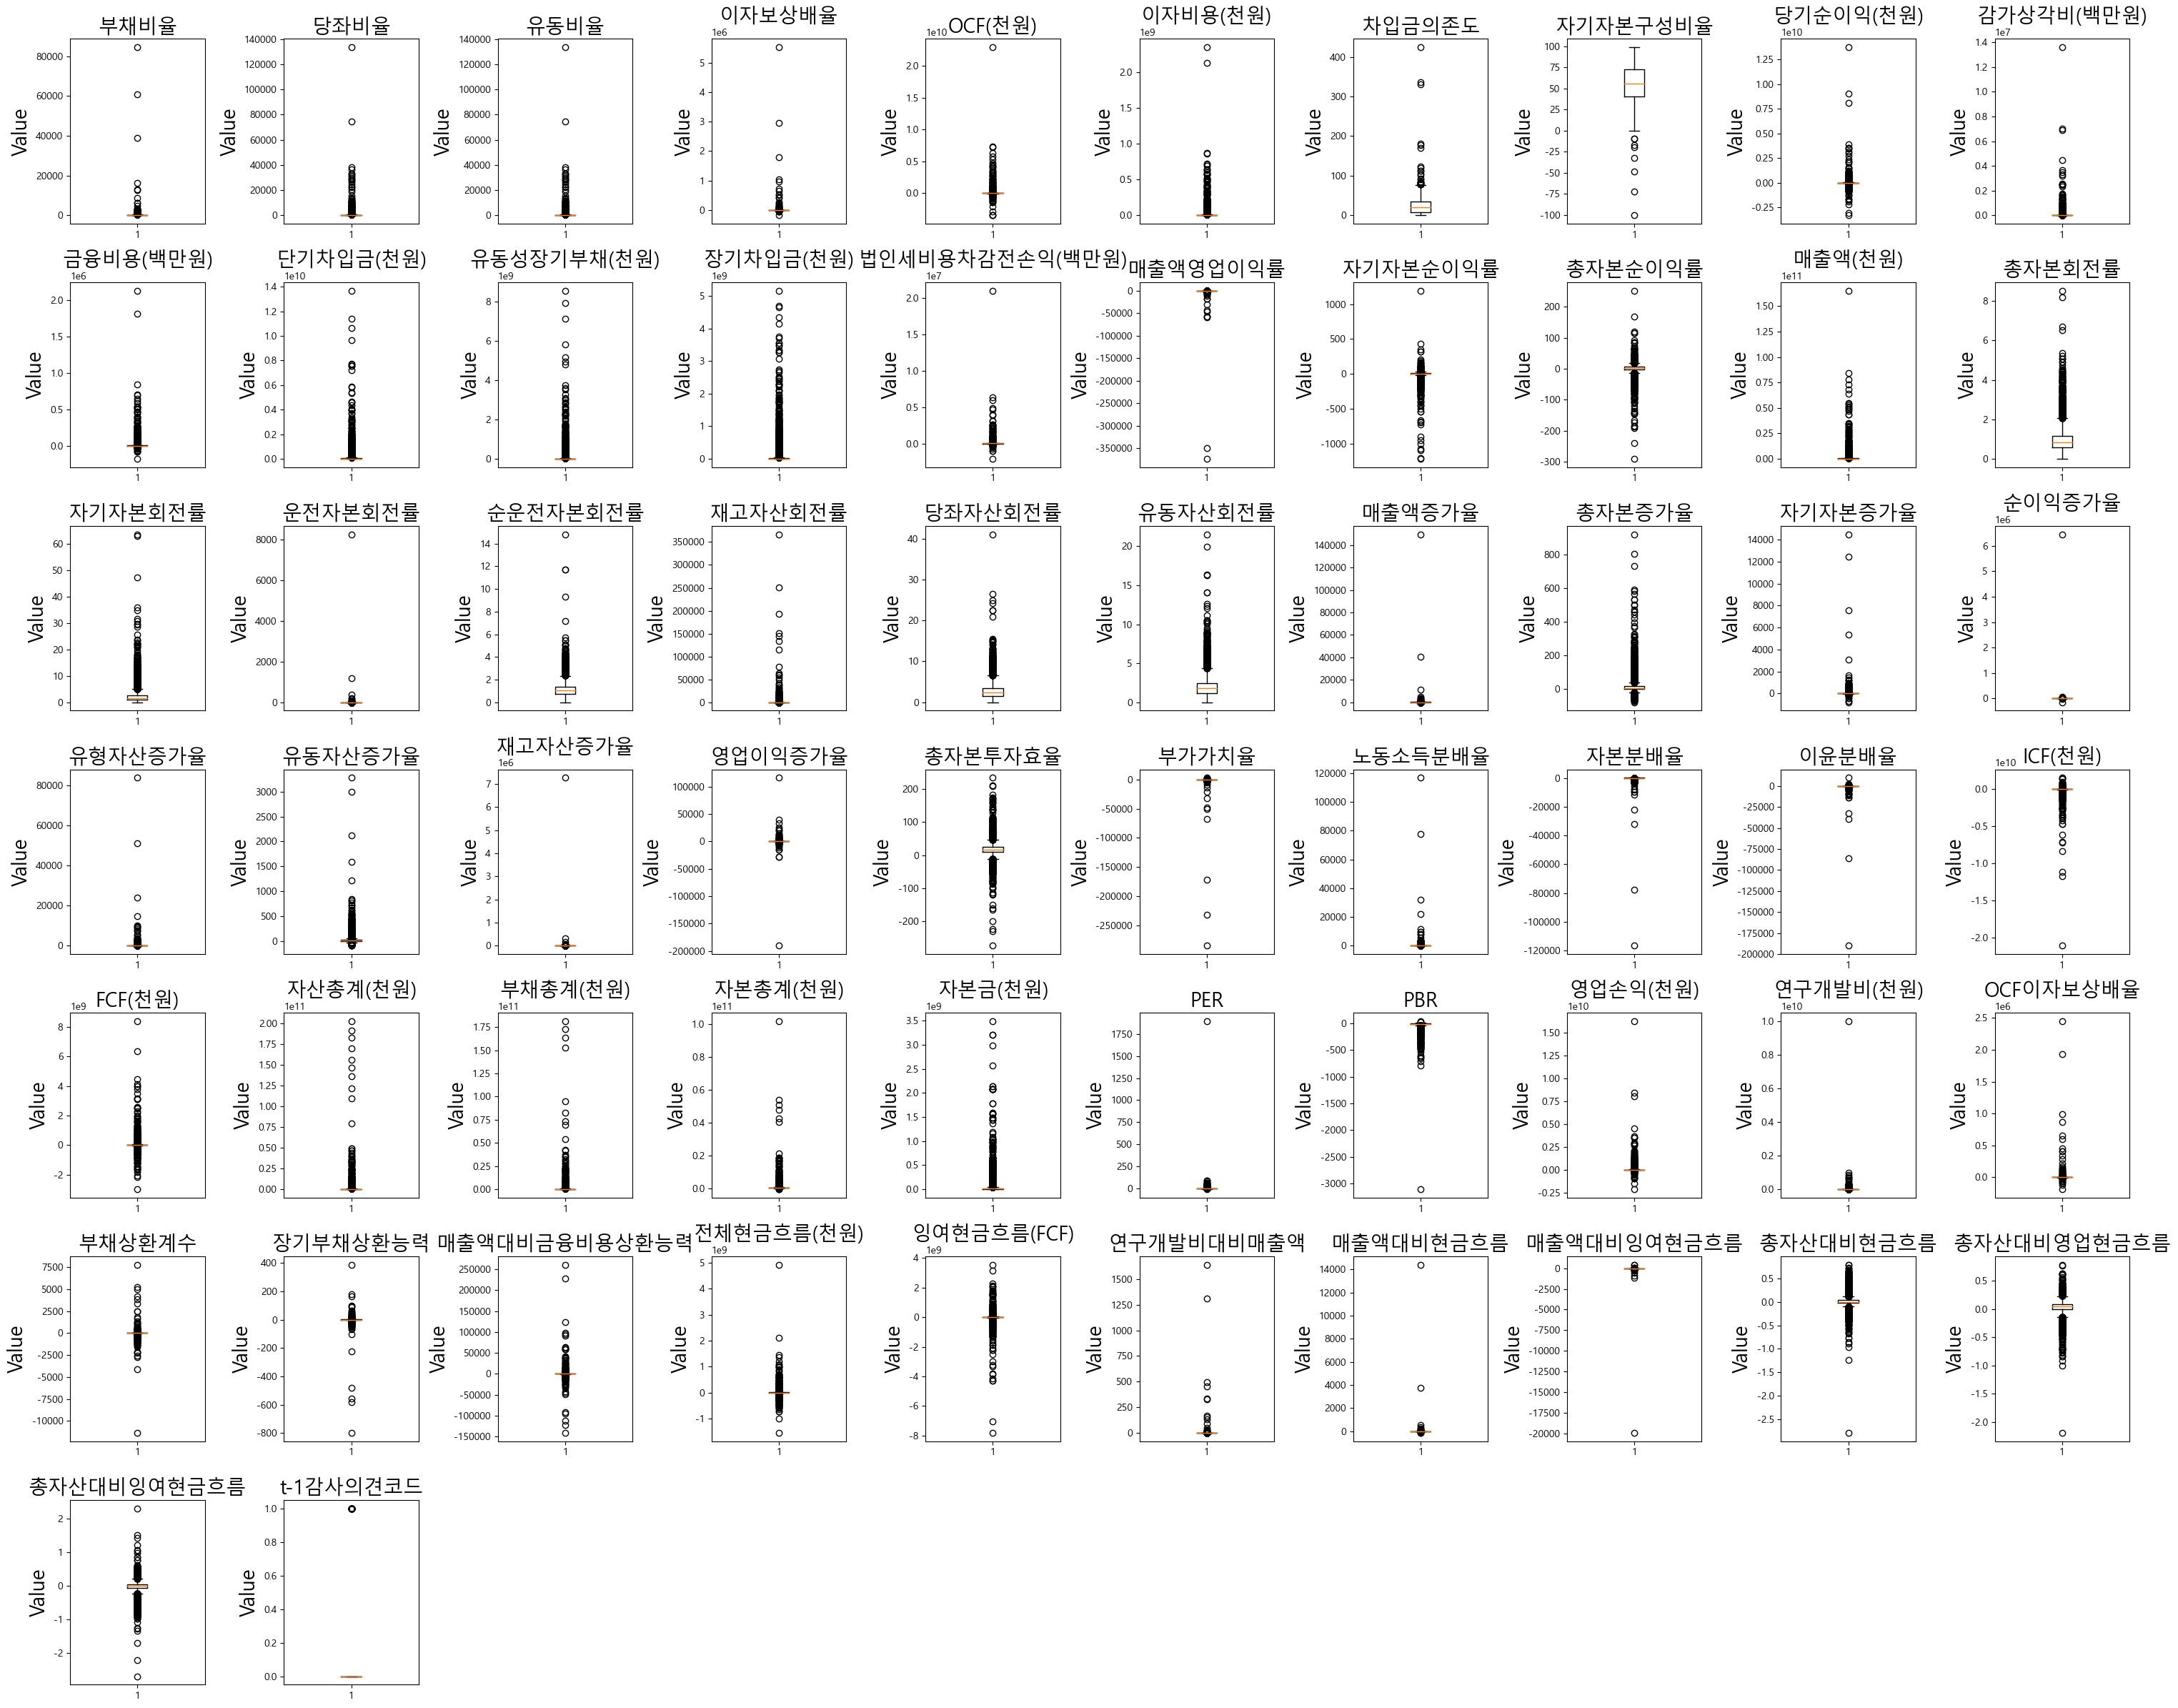

In [59]:
import matplotlib.pyplot as plt

df_수치_윈저라이징전 = train_data[train_data.select_dtypes(float).columns]
num_columns = len(df_수치_윈저라이징전.columns)

# 서브플롯의 크기 계산
nrows = (num_columns - 1) // 10 + 1
ncols = min(num_columns, 10)

# subplots로 boxplot 출력 (계산된 행과 열 개수로 서브플롯 그리기)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 24))

# 컬럼 개수에 따라 그려야 할 서브플롯의 개수만큼만 boxplot 그리기
for i, col in enumerate(df_수치_윈저라이징전):
    ax = axes[i // ncols, i % ncols]
    ax.boxplot(df_수치_윈저라이징전[col].dropna())
    ax.set_title(col, fontsize=20)  # 글씨 크기 설정
    ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# 남은 서브플롯 삭제
for j in range(num_columns, nrows * ncols):
    fig.delaxes(axes.flatten()[j])  # 남은 서브플롯의 인덱스를 가져옴

plt.tight_layout()
plt.show()


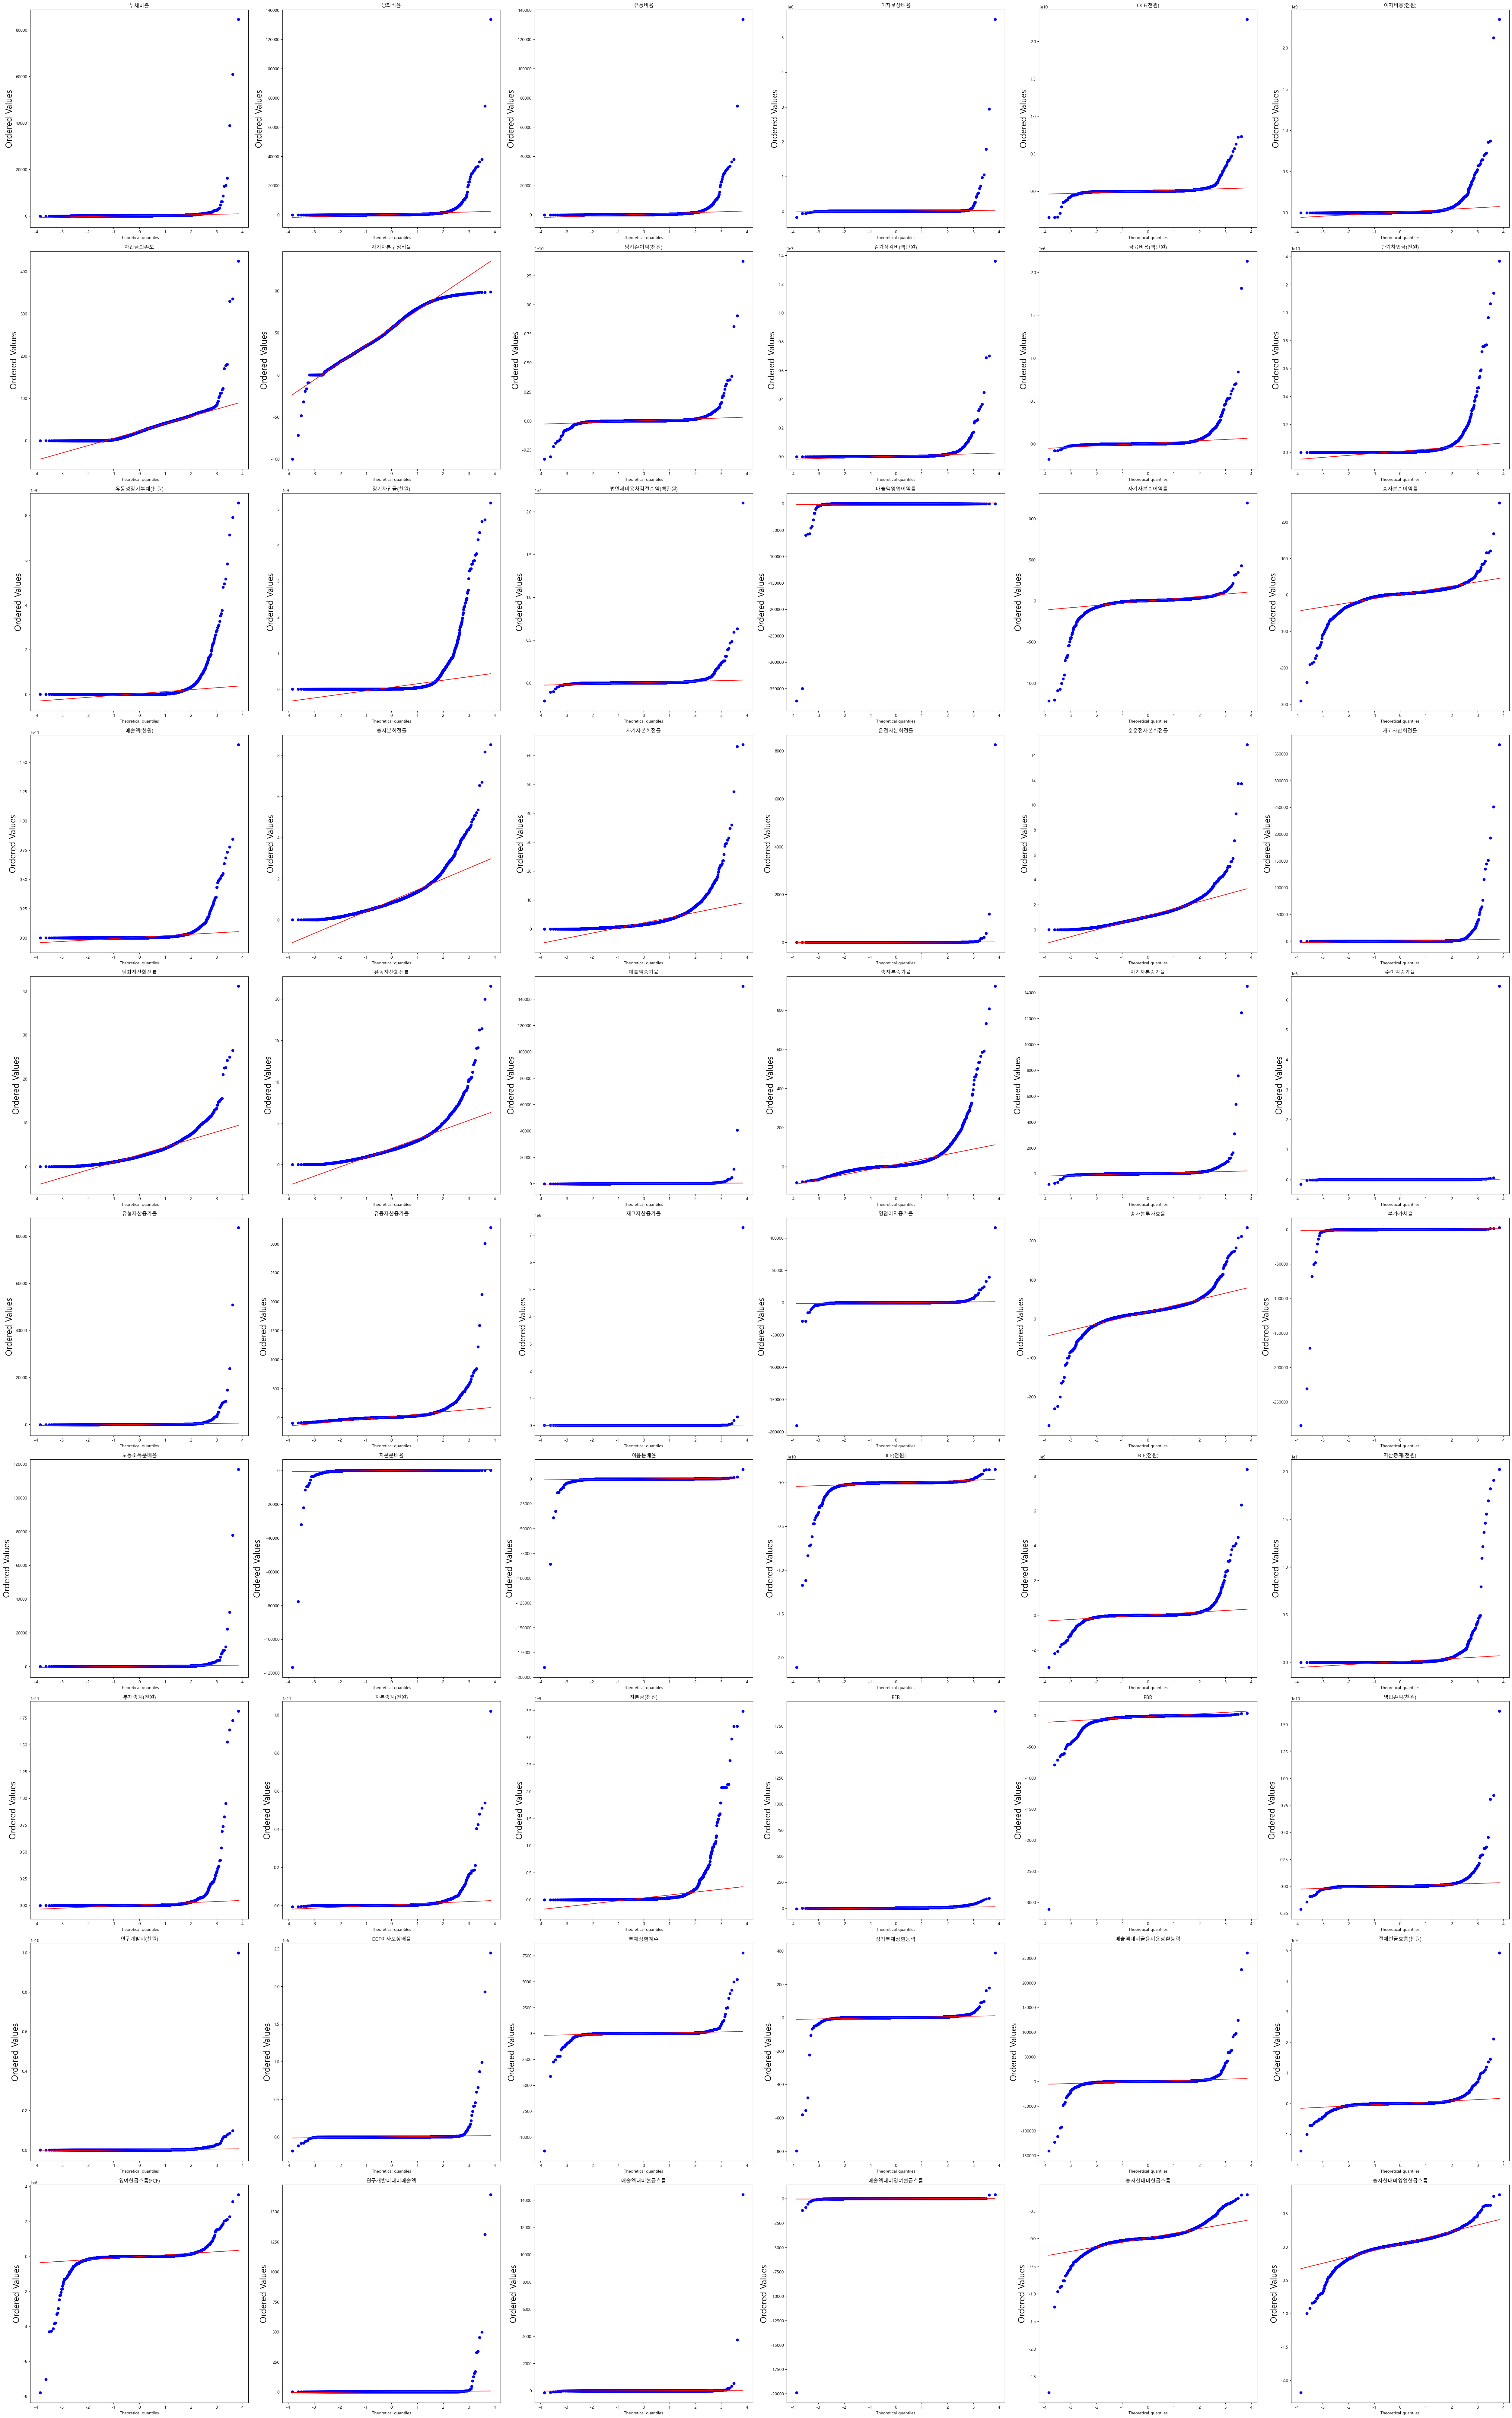

In [60]:
from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((50, 80))

    for ax, i in zip(axs.ravel(), df):
            ax.set_title(col, fontsize=20)  # 글씨 크기 설정
            ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(df_수치_윈저라이징전,6,10)

---

### X_trian에 대한 윈져라이징 --> 보류 ! 드랍하기로함!

In [743]:
# import matplotlib.pyplot as plt

# columns=[ '부채비율', '당좌비율','유동비율', '이자보상배율', '차입금의존도', '자기자본구성비율',
#        '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
#        '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
#        '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
#        '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
#        '노동소득분배율', '자본분배율', '이윤분배율','파생이자보상배율',
#        '부채상환계수', '장기/EBITDA', '금융대비매출액', '연구개발비대비매출액',
#        '매출액대비현금흐름', '총자산대비현금흐름', '총부채대비현금흐름', '총자본대비현금흐름', '총자산대비영업현금흐름',
#        '총자본대비영업현금흐름', '총부채대비영업현금흐름']

# # subplots로 boxplot 출력 (4행 9열로 서브플롯 그리기)
# fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(30, 24))

# # 36개의 컬럼에 대한 boxplot 그리기
# for i, col in enumerate(columns):
#     ax = axes[i // 6, i % 6]
#     ax.boxplot(X_train[col].dropna())
#     ax.set_title(col, fontsize=20)  # 글씨 크기 설정
#     ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정

# # 남은 서브플롯 삭제
# for j in range(len(columns), 7 * 6):
#     fig.delaxes(axes[j // 6, j % 6])

# plt.tight_layout()
# plt.show()


In [744]:
# from scipy import stats

# def qqplot(df,ncols,nrows):
#     plt.rcParams['axes.unicode_minus'] = False
#     plt.rcParams["font.family"] = 'Malgun Gothic'
   
#     fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
#     fig.set_size_inches((50, 80))

#     for ax, i in zip(axs.ravel(), df):
#             ax.set_title(col, fontsize=20)  # 글씨 크기 설정
#             ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
#             stats.probplot(df[i], dist=stats.norm, plot=ax)
#             ax.set_title(str(i))

#     plt.show()

# qqplot(X_train[columns],7,6)

In [745]:
# from scipy.stats.mstats import winsorize

# X_train['부채비율'] = winsorize(X_train['부채비율'], limits= (0, 0.01))
# X_train['당좌비율'] = winsorize(X_train['당좌비율'], limits= (0, 0.01))
# X_train['유동비율'] = winsorize(X_train['유동비율'], limits= (0, 0.01))
# X_train['이자보상배율'] = winsorize(X_train['이자보상배율'], limits= (0, 0.01))
# X_train['차입금의존도'] = winsorize(X_train['차입금의존도'], limits= (0, 0.01))
# X_train['매출액영업이익률'] = winsorize(X_train['매출액영업이익률'], limits= (0.01, 0))
# X_train['자기자본순이익률'] = winsorize(X_train['자기자본순이익률'], limits= (0.008, 0.002))
# X_train['총자본순이익률'] = winsorize(X_train['총자본순이익률'], limits= (0.01, 0))
# X_train['총자본회전률'] = winsorize(X_train['총자본회전률'], limits= (0, 0.01))
# X_train['자기자본회전률'] = winsorize(X_train['자기자본회전률'], limits= (0, 0.01))
# X_train['운전자본회전률'] = winsorize(X_train['운전자본회전률'], limits= (0, 0.01))
# X_train['순운전자본회전률'] = winsorize(X_train['순운전자본회전률'], limits= (0, 0.01))
# X_train['재고자산회전률'] = winsorize(X_train['재고자산회전률'], limits= (0, 0.01))

# X_train['당좌자산회전률'] = winsorize(X_train['당좌자산회전률'], limits= (0, 0.01))
# X_train['유동자산회전률'] = winsorize(X_train['유동자산회전률'], limits= (0, 0.01))
# X_train['매출액증가율'] = winsorize(X_train['매출액증가율'], limits= (0, 0.01))
# X_train['총자본증가율'] = winsorize(X_train['총자본증가율'], limits= (0, 0.01))
# X_train['자기자본증가율'] = winsorize(X_train['자기자본증가율'], limits= (0, 0.01))
# X_train['순이익증가율'] = winsorize(X_train['순이익증가율'], limits= (0, 0.01))
# X_train['유형자산증가율'] = winsorize(X_train['유형자산증가율'], limits= (0, 0.01))
# X_train['유동자산증가율'] = winsorize(X_train['유동자산증가율'], limits= (0, 0.01))
# X_train['재고자산증가율'] = winsorize(X_train['재고자산증가율'], limits= (0, 0.01))
# X_train['영업이익증가율'] = winsorize(X_train['영업이익증가율'], limits= (0, 0.01))

# X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.001, 0.009))
# X_train['부가가치율'] = winsorize(X_train['부가가치율'], limits= (0.001, 0.009))
# X_train['총자본투자효율'] = winsorize(X_train['총자본투자효율'], limits= (0.008, 0.002))
# X_train['노동소득분배율'] = winsorize(X_train['노동소득분배율'], limits= (0, 0.01))
# X_train['자본분배율'] = winsorize(X_train['자본분배율'], limits= (0.01, 0))
# X_train['이윤분배율'] = winsorize(X_train['이윤분배율'], limits= (0.009, 0.001))
# X_train['파생이자보상배율'] = winsorize(X_train['파생이자보상배율'], limits= (0.003, 0.007))

# X_train['부채상환계수'] = winsorize(X_train['부채상환계수'], limits= (0.006, 0.004))
# X_train['장기/EBITDA'] = winsorize(X_train['장기/EBITDA'], limits= (0.005, 0.005))
# X_train['금융대비매출액'] = winsorize(X_train['금융대비매출액'], limits= (0.004, 0.006))
# X_train['연구개발비대비매출액'] = winsorize(X_train['연구개발비대비매출액'], limits= (0, 0.01))
# X_train['매출액대비현금흐름'] = winsorize(X_train['매출액대비현금흐름'], limits= (0.005, 0.005))
# X_train['총자산대비현금흐름'] = winsorize(X_train['총자산대비현금흐름'], limits= (0.006, 0.004))
# # X_train['총부채대비현금흐름'] = winsorize(X_train['총부채대비현금흐름'], limits= (0.007, 0.003))
# X_train['총자본대비현금흐름'] = winsorize(X_train['총자본대비현금흐름'], limits= (0.005, 0.005))
# X_train['총자본대비영업현금흐름'] = winsorize(X_train['총자본대비영업현금흐름'], limits= (0.004, 0.006))
# # X_train['총자산대비영업현금흐름'] = winsorize(X_train['총자산대비영업현금흐름'], limits= (0.00, 0.006))
# X_train['총부채대비영업현금흐름'] = winsorize(X_train['총부채대비영업현금흐름'], limits= (0.002, 0.008))


---

#### 양쪽 꼬리를 drop하는 함수
    - 고려중

In [62]:
import numpy as np

def trimmed_mean_with_ratio(data, left_trim_ratio=0.01, right_trim_ratio=0.01):
    data.sort()
    left_trim_size = int(len(data) * left_trim_ratio)
    right_trim_size = int(len(data) * right_trim_ratio)
    trimmed_data = data[left_trim_size:-right_trim_size]
    return np.mean(trimmed_data)


---

In [63]:
# 데이터프레임에서 '이자보상배율' 열의 1퍼센트 절사평균과 표준편차 계산
def trimmed_mean_1(x):
    trim_pct = 0.02
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.mean()

def trimmed_std_1(x):
    trim_pct = 0.02
    lower_bound = np.percentile(x, trim_pct * 100)
    upper_bound = np.percentile(x, (1 - trim_pct) * 100)
    trimmed_values = x[(x >= lower_bound) & (x <= upper_bound)]
    return trimmed_values.std()

train_data['평균이보배'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_mean_1)
train_data['이보배표준편차'] = train_data.groupby(['산업분류', 'Year'])['이자보상배율'].transform(trimmed_std_1)

# 개별 이자보상배율과 평균-표준편차를 비교하여 이보배초과여부 계산
train_data['이보배초과여부'] = np.where(train_data['이자보상배율'] < (train_data['평균이보배'] - train_data['이보배표준편차']), 1, 0)

In [64]:
train_data[['회사명','거래소코드','산업분류','Year','이자보상배율', '평균이보배', '이보배초과여부']].head(50)

,회사명,거래소코드,산업분류,Year,이자보상배율,평균이보배,이보배초과여부
11838,알톤스포츠,123750,제조업,2014,20.378314,184.863561,0
2119,대림통상,6570,제조업,2013,0.227011,144.546226,0
5453,제이와이피엔터테인먼트,35900,정보통신업,2017,3867.593778,670.567615,0
1225,쌍용씨앤이,3410,제조업,2015,5.131511,188.872604,0
12592,필옵틱스,161580,제조업,2021,-4.460295,37.903638,0
2345,이수페타시스,7660,제조업,2012,4.614500,26.831154,0
209,가온전선,500,제조업,2013,3.239944,144.546226,0
914,제일파마홀딩스,2620,"전문, 과학 및 기술 서비스업",2021,-2.726263,23.872843,0
9786,동양고속,84670,운수 및 창고업,2015,5.396484,5.106638,0
7404,프리엠스,53160,제조업,2013,182.441441,144.546226,0


In [749]:
# import pandas as pd
# import numpy as np

# def calculate_mean_std_by_industry(df):
#     # 데이터프레임에서 산업과 연도별로 그룹화하여 이자보상배율의 평균과 표준편차를 계산하고 딕셔너리로 저장
#     grouped = df.groupby(['산업분류', 'Year'])
#     industry_mean_std_dict = {}
#     for (industry, year), group in grouped:
#         trimmed_mean = np.percentile(group['이자보상배율'], [1, 99]).mean()
#         trimmed_std = np.percentile(group['이자보상배율'], [1,99]).std()
#         industry_mean_std_dict[(industry, year)] = (trimmed_mean, trimmed_std)
    
#     return industry_mean_std_dict

# def calculate_excess_by_industry(df):
#     # 산업과 연도별 이자보상배율의 평균과 표준편차를 딕셔너리로 받기
#     industry_mean_std_dict = calculate_mean_std_by_industry(df)

#     # '이보배초과여부' 계산하여 설정
#     df['이보배초과여부'] = df.apply(lambda row: int(row['이자보상배율'] < (industry_mean_std_dict[(row['산업분류'], row['Year'])][0] - industry_mean_std_dict[(row['산업분류'], row['Year'])][1])), axis=1)




# # '이보배초과여부' 계산하여 설정
# calculate_excess_by_industry(train_data)

# train_data


In [65]:
train_data['이보배초과여부'].value_counts()

이보배초과여부
0    11167
1      163
Name: count, dtype: int64

In [66]:
train_data[train_data['이보배초과여부']==1]['t-1감사의견코드'].value_counts()

t-1감사의견코드
0.0    161
1.0      2
Name: count, dtype: int64

In [67]:
train_data['이자보상배율'].std()

64105.75838027925

In [68]:
train_data['이자보상배율'].mean()

1723.0560624962627

In [69]:
len(train_data[train_data['이자보상배율']==999999999.0])

0

In [70]:
train_data.describe()

,거래소코드,회계년도,Year,산업분류코드,부채비율,당좌비율,유동비율,이자보상배율,OCF(천원),이자비용(천원),차입금의존도,자기자본구성비율,당기순이익(천원),감가상각비(백만원),금융비용(백만원),단기차입금(천원),유동성장기부채(천원),장기차입금(천원),법인세비용차감전손익(백만원),매출액영업이익률,자기자본순이익률,총자본순이익률,매출액(천원),총자본회전률,자기자본회전률,운전자본회전률,순운전자본회전률,재고자산회전률,당좌자산회전률,유동자산회전률,매출액증가율,총자본증가율,자기자본증가율,순이익증가율,유형자산증가율,유동자산증가율,재고자산증가율,영업이익증가율,총자본투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,ICF(천원),FCF(천원),자산총계(천원),부채총계(천원),자본총계(천원),자본금(천원),PER,PBR,영업손익(천원),연구개발비(천원),자본잠식률,OCF이자보상배율,부채상환계수,장기부채상환능력,매출액대비금융비용상환능력,전체현금흐름(천원),잉여현금흐름(FCF),연구개발비대비매출액,매출액대비현금흐름,매출액대비잉여현금흐름,총자산대비현금흐름,총자산대비영업현금흐름,총자산대비잉여현금흐름,t-1감사의견코드,평균이보배,이보배표준편차,이보배초과여부
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,1.133000e+04,11330.000000,11330.000000,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,1.133000e+04,11330.000000,11330.000000,1.133000e+04,1.133000e+04,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11280.000000,11203.000000,11330.000000
mean,78479.963813,2016.481024,2016.481024,35.557193,141.963736,333.252833,374.729063,1.723056e+03,3.644569e+07,8.558088e+06,22.648892,55.820920,1.868638e+07,2.689102e+04,6.190329e+03,7.787732e+07,3.889218e+07,4.794779e+07,3.485891e+04,-99.773514,-0.621268,1.085018,6.759021e+08,0.925414,2.105165,1.161265,1.116730,277.883942,2.720184,1.957260,30.636747,11.171765,17.385146,5.952746e+02,42.610528,14.369810,7.356520e+02,27.349019,18.007379,-65.970306,99.949461,-7.954756,-51.484693,-4.155951e+07,1.129218e+07,8.328403e+08,4.919135e+08,3.409268e+08,3.234777e+07,2.311603,-17.848271,3.151055e+07,5.903061e+06,2016.481024,1.148674e+03,-0.612645,0.408527,96.758841,6.178369e+06,-5.113815e+06,0.508645,1.742322,-2.206439,0.013388,0.040766,-0.021627,0.005119,170.075312,538.368931,0.014387
std,80968.024312,3.147875,3.147875,18.030538,1087.256312,1908.377375,1911.300907,6.410576e+04,3.173896e+08,4.639209e+07,18.414308,20.848884,2.211149e+08,1.993656e+05,4.000221e+04,3.666403e+08,2.345191e+08,2.192609e+08,2.604437e+05,4950.997014,44.814802,13.882716,3.189716e+09,0.572023,2.330184,78.510368,0.610465,5552.089633,1.897233,1.224383,1465.088051,36.398852,210.697001,6.063967e+04,993.570987,69.975837,6.838904e+04,2276.450636,17.708479,3934.068473,1391.574663,1391.264231,2050.081977,3.336234e+08,1.954202e+08,5.113170e+09,3.894220e+09,1.654145e+09,1.261496e+08,18.080539,45.504439,2.330778e+08,9.704438e+07,3.147875,3.418850e+04,186.545423,12.957483,5026.797604,8.212390e+07,1.970122e+08,21.357101,139.983476,187.636433,0.095088,0.102528,0.148139,0.071368,251.997764,499.626036,0.119083
min,20.000000,2011.000000,2011.000000,1.000000,0.000000,0.130000,0.130000,-1.808022e+05,-3.480396e+09,0.000000e+00,0.000000,-100.390000,-3.292997e+09,0.000000e+00,-1.786030e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.105717e+06,-373364.740000,-1217.810000,-290.970000,1.975000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.850000,-81.910000,-807.100000,-1.522079e+05,-99.710000,-97.710000,-9.997000e+01,-190325.270000,-273.810000,-284516.290000,0.000000,-116701.060000,-190075.340000,-2.111256e+10,-2.996599e+09,2.387519e+06,4.581660e+05,-6.760182e+08,1.056600e+04,-5.740000,-3108.484668,-2.124494e+09,-1.955020e+05,2011.000000,-1.858820e+05,-11328.047979,-798.305652,-140822.693939,-1.542255e+09,-7.802363e+09,-0.004381,-138.829527,-19895.239494,-2.791884,-2.187211,-2.693598,0.000000,-11.655703,0.900697,0.000000
25%,15890.000000,2014.000000,2014.000000,23.000000,37.125000,73.942500,99

In [71]:
train_data.columns

Index(['회사명', '거래소코드', '회계년도', 'Year', '산업분류코드', '산업분류', '부채비율', '당좌비율',
       '유동비율', '이자보상배율', 'OCF(천원)', '이자비용(천원)', '차입금의존도', '자기자본구성비율',
       '당기순이익(천원)', '감가상각비(백만원)', '금융비용(백만원)', '단기차입금(천원)', '유동성장기부채(천원)',
       '장기차입금(천원)', '법인세비용차감전손익(백만원)', '매출액영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액(천원)', '총자본회전률', '자기자본회전률', '운전자본회전률', '순운전자본회전률', '재고자산회전률',
       '당좌자산회전률', '유동자산회전률', '매출액증가율', '총자본증가율', '자기자본증가율', '순이익증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '영업이익증가율', '총자본투자효율', '부가가치율',
       '노동소득분배율', '자본분배율', '이윤분배율', 'ICF(천원)', 'FCF(천원)', '자산총계(천원)',
       '부채총계(천원)', '자본총계(천원)', '자본금(천원)', 'PER', 'PBR', '영업손익(천원)',
       '연구개발비(천원)', '자본잠식률', 'OCF이자보상배율', '부채상환계수', '장기부채상환능력',
       '매출액대비금융비용상환능력', '전체현금흐름(천원)', '잉여현금흐름(FCF)', '연구개발비대비매출액', '매출액대비현금흐름',
       '매출액대비잉여현금흐름', '총자산대비현금흐름', '총자산대비영업현금흐름', '총자산대비잉여현금흐름', '기업수명주기',
       't-1감사의견코드', '평균이보배', '이보배표준편차', '이보배초과여부'],
      dtype='object')